In [2]:
import pandas as pd
import numpy as np 
import scipy 
import matplotlib.pyplot as plt
import kaggle

# Hypotheses
- red is more often the winner

# Tasks
## Predict who will win
- Clean data
 - Add weight classes
 - Remove NaN values
- Decide which features to use
- Test/Train split data
- Test mutiple models on data

## Try predictive modeling on subsets of the data
- Split the data by when features start being recorded

## Geo plot of hometowns
- Will probably need to encode all the hometowns because right now they're all strings
- Will need to learn how to make a geo plot, what library will be best for this?



In [2]:
#!kaggle datasets download -d calmdownkarm/ufcdataset

In [3]:
df = pd.read_csv('clean_fights')

In [4]:
pd.options.display.max_columns = 300
pd.options.display.max_rows = 900

In [5]:
cols = pd.Series(df.columns)
cols

0              BPrev
1            BStreak
2              B_Age
3           B_Height
4         B_HomeTown
5               B_ID
6         B_Location
7             B_Name
8           B_Weight
9               Date
10          Event_ID
11          Fight_ID
12        Last_round
13         Max_round
14             RPrev
15             R_Age
16          R_Height
17        R_HomeTown
18              R_ID
19        R_Location
20            R_Name
21          R_Weight
22             winby
23            winner
24    avg_weight_lbs
25      weight_class
dtype: object

In [6]:
df.BPrev.mean()

2.391285591026747

In [7]:
sum = df.BPrev.sum()
N = len(df.BPrev)
# Outputs mean
sum/N

2.391285591026747

In [8]:
nan_sum = df.isna().sum()

In [9]:
groupby_winner = df.groupby('winner')
groupby_winner.count()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,B__Round1_Strikes_Body Significant Strikes_Landed,B__Round1_Strikes_Body Total Strikes_Attempts,B__Round1_Strikes_Body Total Strikes_Landed,B__Round1_Strikes_Clinch Body Strikes_Attempts,B__Round1_Strikes_Clinch Body Strikes_Landed,B__Round1_Strikes_Clinch Head Strikes_Attempts,B__Round1_Strikes_Clinch Head Strikes_Landed,B__Round1_Strikes_Clinch Leg Strikes_Attempts,B__Round1_Strikes_Clinch Leg Strikes_Landed,B__Round1_Strikes_Clinch Significant Kicks_Attempts,B__Round1_Strikes_Clinch Significant Kicks_Landed,B__Round1_Strikes_Clinch Significant Punches_Attempts,B__Round1_Strikes_Clinch Significant Punches_Landed,B__Round1_Strikes_Clinch Significant Strikes_Attempts,B__Round1_Strikes_Clinch Significant Strikes_Landed,B__Round1_Strikes_Clinch Total Strikes_Attempts,B__Round1_Strikes_Clinch Total Strikes_Landed,B__Round1_Strikes_Distance Body Kicks_Attempts,B__Round1_Strikes_Distance Body Kicks_Landed,B__Round1_Strikes_Distance Body Punches_Attempts,B__Round1_Strikes_Distance Body Punches_Landed,B__Round1_Strikes_Distance Body Strikes_Attempts,B__Round1_Strikes_Distance Body Strikes_Landed,B__Round1_Strikes_Distance Head Kicks_Attempts,B__Round1_Strikes_Distance Head Kicks_Landed,B__Round1_Strikes_Distance Head Punches_Attempts,B__Round1_Strikes_Distance Head Punches_Landed,B__Round1_Strikes_Distance Head Strikes_Attempts,B__Round1_Strikes_Distance Head Strikes_Landed,B__Round1_Strikes_Distance Leg Kicks_Attempts,B__Round1_Strikes_Distance Leg Kicks_Landed,B__Round1_Strikes_Distance Leg Strikes_Attempts,B__Round1_Strikes_Distance Leg Strikes_Landed,B__Round1_Strikes_Distance Strikes_Attempts,B__Round1_Strikes_Distance Strikes_Landed,B__Round1_Strikes_Ground Body Strikes_Attempts,B__Round1_Strikes_Ground Body Strikes_Landed,B__Round1_Strikes_Ground Head Strikes_Attempts,B__Round1_Strikes_Ground Head Strikes_Landed,B__Round1_Strikes_Ground Leg Strikes_Attempts,B__Round1_Strikes_Ground Leg Strikes_Landed,B__Round1_Strikes_Ground Significant Kicks_Attempts,B__Round1_Strikes_Ground Significant Kicks_Landed,B__Round1_Strikes_Ground Significant Punches_Attempts,B__Round1_Strikes_Ground Significant Punches_Landed,B__Round1_Strikes_Ground Significant Strikes_Attempts,B__Round1_Strikes_Ground Significant Strikes_Landed,B__Round1_Strikes_Ground Total Strikes_Attempts,B__Round1_Strikes_Ground Total Strikes_Landed,B__Round1_Strikes_Head Significant Strikes_Attempts,B__Round1_Strikes_Head Significant Strikes_Landed,B__Round1_Strikes_Head Total Strikes_Attempts,B__Round1_Strikes_Head Total Strikes_Landed,B__Round1_Strikes_Kicks_Attempts,B__Round1_Strikes_Kicks_Landed,B__Round1_Strikes_Knock Down_Landed,B__Round1_Strikes_Leg Total Strikes_Attempts,B__Round1_Strikes_Leg Total Strikes_Landed,B__Round1_Strikes_Legs Significant Strikes_Attempts,B__Round1_Strikes_Legs Significant Strikes_Landed,B__Round1_Strikes_Legs Total Strikes_Attempts,B__Round1_Strikes_Legs Total Strikes_Landed,B__Round1_Strikes_Punches_Attempts,B__Round1_Strikes_Punches_Landed,B__Round1_Strikes_Significant Strikes_Attempts,B__Round1_Strikes_Significant Strikes_Landed,B__Round1_Strikes_Total Strikes_Attempts,B__Round1_Strikes_Total Strikes_Landed,B__Round1_TIP_Back Control Time,B__Round1_TIP_Clinch Time,B__Round1_TIP_Control Time,B__Round1_TIP_Distance Time,B__Round1_TIP_Ground Control Time,B__Round1_TIP_Ground Time,B__Round1_TIP_Guard Control Time,B__Round1_TIP_Half Guard Control Time,B__Round1_TIP_Misc. Ground Control Time,B__Round1_TIP_Mount Control Time,B__Round1_TIP_Neutral Time,B__Round1_TIP_Side Control Time,B__Round1_TIP_Standing Time,B__Round2_Grappling_Reversals_Landed,B__Round2_Grappling_Standups_Landed,B__Round2_Grappling_Submissions_Attempts,B__Round2_Gra

In [10]:
# groupby_winner.get_group('red')

In [11]:
Number_of_fighters = len(df.B_ID.unique()) + len(df.R_ID.unique())
Number_of_fighters

1777

In [12]:
df.loc[2292:]

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,B__Round1_Strikes_Body Significant Strikes_Landed,B__Round1_Strikes_Body Total Strikes_Attempts,B__Round1_Strikes_Body Total Strikes_Landed,B__Round1_Strikes_Clinch Body Strikes_Attempts,B__Round1_Strikes_Clinch Body Strikes_Landed,B__Round1_Strikes_Clinch Head Strikes_Attempts,B__Round1_Strikes_Clinch Head Strikes_Landed,B__Round1_Strikes_Clinch Leg Strikes_Attempts,B__Round1_Strikes_Clinch Leg Strikes_Landed,B__Round1_Strikes_Clinch Significant Kicks_Attempts,B__Round1_Strikes_Clinch Significant Kicks_Landed,B__Round1_Strikes_Clinch Significant Punches_Attempts,B__Round1_Strikes_Clinch Significant Punches_Landed,B__Round1_Strikes_Clinch Significant Strikes_Attempts,B__Round1_Strikes_Clinch Significant Strikes_Landed,B__Round1_Strikes_Clinch Total Strikes_Attempts,B__Round1_Strikes_Clinch Total Strikes_Landed,B__Round1_Strikes_Distance Body Kicks_Attempts,B__Round1_Strikes_Distance Body Kicks_Landed,B__Round1_Strikes_Distance Body Punches_Attempts,B__Round1_Strikes_Distance Body Punches_Landed,B__Round1_Strikes_Distance Body Strikes_Attempts,B__Round1_Strikes_Distance Body Strikes_Landed,B__Round1_Strikes_Distance Head Kicks_Attempts,B__Round1_Strikes_Distance Head Kicks_Landed,B__Round1_Strikes_Distance Head Punches_Attempts,B__Round1_Strikes_Distance Head Punches_Landed,B__Round1_Strikes_Distance Head Strikes_Attempts,B__Round1_Strikes_Distance Head Strikes_Landed,B__Round1_Strikes_Distance Leg Kicks_Attempts,B__Round1_Strikes_Distance Leg Kicks_Landed,B__Round1_Strikes_Distance Leg Strikes_Attempts,B__Round1_Strikes_Distance Leg Strikes_Landed,B__Round1_Strikes_Distance Strikes_Attempts,B__Round1_Strikes_Distance Strikes_Landed,B__Round1_Strikes_Ground Body Strikes_Attempts,B__Round1_Strikes_Ground Body Strikes_Landed,B__Round1_Strikes_Ground Head Strikes_Attempts,B__Round1_Strikes_Ground Head Strikes_Landed,B__Round1_Strikes_Ground Leg Strikes_Attempts,B__Round1_Strikes_Ground Leg Strikes_Landed,B__Round1_Strikes_Ground Significant Kicks_Attempts,B__Round1_Strikes_Ground Significant Kicks_Landed,B__Round1_Strikes_Ground Significant Punches_Attempts,B__Round1_Strikes_Ground Significant Punches_Landed,B__Round1_Strikes_Ground Significant Strikes_Attempts,B__Round1_Strikes_Ground Significant Strikes_Landed,B__Round1_Strikes_Ground Total Strikes_Attempts,B__Round1_Strikes_Ground Total Strikes_Landed,B__Round1_Strikes_Head Significant Strikes_Attempts,B__Round1_Strikes_Head Significant Strikes_Landed,B__Round1_Strikes_Head Total Strikes_Attempts,B__Round1_Strikes_Head Total Strikes_Landed,B__Round1_Strikes_Kicks_Attempts,B__Round1_Strikes_Kicks_Landed,B__Round1_Strikes_Knock Down_Landed,B__Round1_Strikes_Leg Total Strikes_Attempts,B__Round1_Strikes_Leg Total Strikes_Landed,B__Round1_Strikes_Legs Significant Strikes_Attempts,B__Round1_Strikes_Legs Significant Strikes_Landed,B__Round1_Strikes_Legs Total Strikes_Attempts,B__Round1_Strikes_Legs Total Strikes_Landed,B__Round1_Strikes_Punches_Attempts,B__Round1_Strikes_Punches_Landed,B__Round1_Strikes_Significant Strikes_Attempts,B__Round1_Strikes_Significant Strikes_Landed,B__Round1_Strikes_Total Strikes_Attempts,B__Round1_Strikes_Total Strikes_Landed,B__Round1_TIP_Back Control Time,B__Round1_TIP_Clinch Time,B__Round1_TIP_Control Time,B__Round1_TIP_Distance Time,B__Round1_TIP_Ground Control Time,B__Round1_TIP_Ground Time,B__Round1_TIP_Guard Control Time,B__Round1_TIP_Half Guard Control Time,B__Round1_TIP_Misc. Ground Control Time,B__Round1_TIP_Mount Control Time,B__Round1_TIP_Neutral Time,B__Round1_TIP_Side Control Time,B__Round1_TIP_Standing Time,B__Round2_Grappling_Reversals_Landed,B__Round2_Grappling_Standups_Landed,B__Round2_Grappling_Submissions_Attempts,B__Round2_Gra

In [13]:
# df.isna().sum()

In [14]:
# df[['B_Name','B_ID', 'BPrev','R_Name', 'R_ID', 'RPrev', 'Date', 'Event_ID', 'winner']]

In [15]:
b_weight = df.B_Weight.fillna(method='ffill')
sorted_b_weight = sorted(b_weight)
# sorted_b_weight = np.array(sorted_b_weight)
b_weight.dtype

dtype('float64')

In [16]:
r_weight = df.R_Weight.fillna(method='ffill')
sorted_r_weight = sorted(r_weight)
r_weight.dtype

dtype('float64')

### Box plots of weights of blue contenders and red contenders 

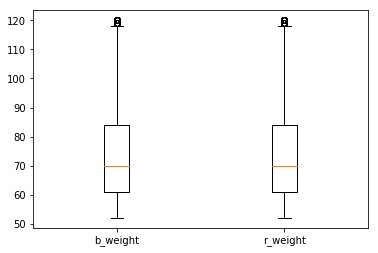

In [17]:
plt.boxplot([sorted_b_weight, sorted_r_weight], labels=['b_weight', 'r_weight']);

### Bar chart of count of fighters in each weight class

In [50]:
# cols is all the columns that are relevent for the expoloration and analysis 
cols = df.columns[444:457].values
cols = np.append(cols, df.columns[892:])
cols = np.append(df.columns[0:9], cols)
cols

array(['BPrev', 'BStreak', 'B_Age', 'B_Height', 'B_HomeTown', 'B_ID',
       'B_Location', 'B_Name', 'B_Weight', 'Date', 'Event_ID', 'Fight_ID',
       'Last_round', 'Max_round', 'RPrev', 'R_Age', 'R_Height',
       'R_HomeTown', 'R_ID', 'R_Location', 'R_Name', 'R_Weight', 'winby',
       'winner'], dtype=object)

In [51]:
fighters = df[cols]
# fighters.B_Weight, fighters.R_Weight = fighters.B_Weight * 2.2, fighters.R_Weight * 2.2

In [52]:
fighters.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,Date,Event_ID,Fight_ID,Last_round,Max_round,RPrev,R_Age,R_Height,R_HomeTown,R_ID,R_Location,R_Name,R_Weight,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,02/03/2014,646,4580,3,3,0,39.0,190.0,"Las Vegas, Nevada USA",377,"Las Vegas, Nevada USA",Frank Mir,119.0,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,02/03/2014,646,4589,5,5,0,32.0,170.0,Manaus Brazil,1052,Rio de Janeiro Brazil,Jose Aldo,65.0,DEC,red
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,02/03/2014,646,4590,1,5,0,31.0,167.0,Natal Brazil,1527,Rio de Janeiro Brazil,Renan Barao,61.0,KO/TKO,red
3,0,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,02/03/2014,646,4605,3,3,0,37.0,160.0,"San Jose, California USA",1253,"Tucson, Arizona USA",Chris Cariaso,56.0,DEC,red
4,0,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,02/03/2014,646,4631,3,3,0,37.0,182.0,"Englewood, NJ USA",464,"Brick, NJ USA",Nick Catone,84.0,DEC,red


## Creating weight class column
### There are more weight classes than previously thought and some fighters are fighting at different weight classes it seems

In [53]:
fighters['avg_weight_lbs'] = (fighters.B_Weight + fighters.R_Weight)/2 * 2.2

C:\Users\Patrick\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
ranges = [-np.inf, 125.0, 135.0, 145.0, 155.0, 165.0, 170.0, 175.0, 185.0, 195.0, 205.0, 225.0, 265.0, np.inf]
labels = ['Strawwweight','Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Super Lightweight', 'Welterweight', 'Super Welterweight',
          'Middleweight', 'Super Middleweight', 'Light Heavyweight', 'Cruiserweight', 'Heavyweight']
weight_classes = fighters.weight_class = pd.cut(fighters.avg_weight_lbs, ranges, labels=labels)
len(weight_classes)

C:\Users\Patrick\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


2318

In [55]:
fighters['weight_class'] = pd.Series(weight_classes)
fighters.head(50)

C:\Users\Patrick\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,Date,Event_ID,Fight_ID,Last_round,Max_round,RPrev,R_Age,R_Height,R_HomeTown,R_ID,R_Location,R_Name,R_Weight,winby,winner,avg_weight_lbs,weight_class
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,02/03/2014,646,4580,3,3,0,39.0,190.0,"Las Vegas, Nevada USA",377,"Las Vegas, Nevada USA",Frank Mir,119.0,DEC,blue,262.9,Cruiserweight
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,02/03/2014,646,4589,5,5,0,32.0,170.0,Manaus Brazil,1052,Rio de Janeiro Brazil,Jose Aldo,65.0,DEC,red,143.0,Bantamweight
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,02/03/2014,646,4590,1,5,0,31.0,167.0,Natal Brazil,1527,Rio de Janeiro Brazil,Renan Barao,61.0,KO/TKO,red,134.2,Flyweight
3,0,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,02/03/2014,646,4605,3,3,0,37.0,160.0,"San Jose, California USA",1253,"Tucson, Arizona USA",Chris Cariaso,56.0,DEC,red,123.2,Strawwweight
4,0,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,02/03/2014,646,4631,3,3,0,37.0,182.0,"Englewood, NJ USA",464,"Brick, NJ USA",Nick Catone,84.0,DEC,red,184.8,Super Welterweight
5,0,0,35.0,180.0,Amazonas Brazil,2101,Rio de Janeiro Brazil,Alan Patrick,70.0,02/03/2014,646,4642,3,3,0,33.0,172.0,"Halifax, Nova Scotia Canada",1675,"Montreal, Quebec Canada",John Makdessi,70.0,DEC,blue,154.0,Featherweight
6,0,0,26.0,175.0,"Detroit, Michigan United States",2157,"Las Vegas, Nevada United States",Kevin Lee,70.0,02/03/2014,646,4649,3,3,0,31.0,175.0,"Wantagh, New York United States",1983,"Wantagh, New York United States",Al Iaquinta,70.0,DEC,red,154.0,Featherweight
7,0,0,33.0,175.0,Dagestan Russia,2158,"Coconut Creek, Florida United States",Rashid Magomedov,70.0,11/05/2016,646,4651,3,3,0,28.0,182.0,"Palos Heights, Illinois United States",2159,"Boston, Massachusetts United States",Tony Martin,70.0,DEC,blue,154.0,Featherweight
8,0,0,36.0,180.0,"Zinzeli, Astrakhan Oblast Russia",2160,"Zinzeli, Astrakhan Oblast Russia",Gasan Umalatov,77.0,02/03/2014,646,4652,3,3,0,31.0,190.0,"Brooklyn, New York United States",2047,"Denver, Colorado United States",Neil Magny,77.0,DEC,red,169.4,Super Lightweight
9,0,0,33.0,162.0,Dagestan Republic Russia,2084,Dagestan Republic Russia,Ali Bagautinov,56.0,02/03/2014,646,4658,3,3,0,28.0,160.0,"Paranagua, Parana Brazil",1966,"Paranagua, Parana Brazil",John Lineker,61.0,DEC,blue,128.7,Flyweight


In [59]:
fighters.isna().sum()

BPrev              0
BStreak            0
B_Age             17
B_Height          17
B_HomeTown        17
B_ID               0
B_Location        13
B_Name             0
B_Weight          12
Date               0
Event_ID           0
Fight_ID           0
Last_round         0
Max_round          0
RPrev              0
R_Age             26
R_Height          24
R_HomeTown        25
R_ID               0
R_Location        24
R_Name             0
R_Weight          22
winby             36
winner             0
avg_weight_lbs    33
weight_class      33
dtype: int64

In [61]:
# fighters.to_csv('fights')